In [1]:
from base import *
from base import Init

from functions import *

from task1 import task1
from task2 import task2
from task3 import task3
from task4 import task4
from task5 import task5

g_Tones, g_Midif, g_Fs, g_BigN = Init()
g_MyTones = [36, 44, 103]

functions_set_tones(g_Tones)

In [2]:
#task1(g_Tones, g_MyTones, g_Fs, g_BigN)

In [3]:
#task2(g_Fs, g_BigN)

In [4]:
#task3(g_Tones, 200, 3, 100, g_Fs, g_BigN)

(131,
 850.8790246832999,
 array([    0,     1,     2, ..., 23997, 23998, 23999]),
 array([1.03828057e-12, 2.43993255e+00, 3.54436755e+00, ...,
        6.94300083e-02, 7.65730945e-03, 7.05711244e-02]))

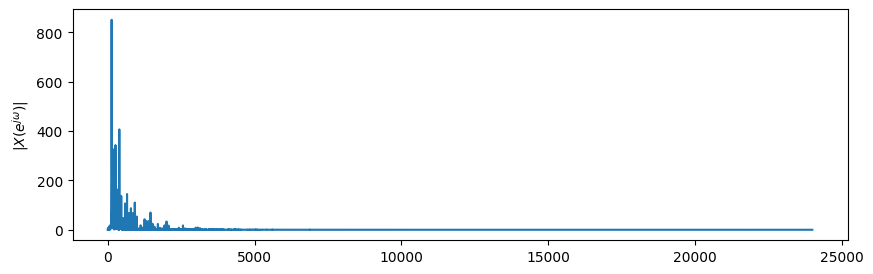

In [5]:
task4(g_Tones, g_Midif, g_MyTones, 200, 10, 100, g_Fs, g_BigN)

In [6]:
#task5(g_Tones, g_Midif, g_MyTones, 2, 200, 10, g_Fs, g_BigN)